In [1]:
import os
import pandas as pd

MODEL_PATH = '/opt/ml/level-3-final-project/Model/model'
DATA_PATH = '/opt/ml/level-3-final-project/Data'

In [2]:
if not os.path.isdir(MODEL_PATH):
    os.mkdir(MODEL_PATH)

In [3]:
score_meta = pd.read_csv(os.path.join(DATA_PATH, 'score_data.csv'))
score_meta = score_meta[score_meta['answer'] == '맞았습니다!!']
score_meta['Problem_problemId'] = score_meta['Problem_problemId'].astype(int)
score_meta = score_meta.reset_index(drop = True)

In [4]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.callbacks import CallbackAny2Vec
import datetime

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 1
        self.loss_to_be_subed = 0
        self.loss_now = 987654321

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed

        self.loss_to_be_subed = loss
        if loss_now < self.loss_now:
            self.loss_now = loss_now
            model.save(os.path.join(MODEL_PATH, 'Word2Vec_Embedding_Model_w_20_e_300.model'))
            print(f'Loss after epoch {self.epoch}: {loss_now}, Total_loss : {loss}')
            print('Model 저장')
        self.epoch += 1

start = datetime.datetime.now()

group_df = score_meta.groupby('User_userId')
sentences = []
for user, g in group_df:
    item_list = g['Problem_problemId'].tolist()
    sentences.append(
        item_list
    )

model = Word2Vec(
                sentences = sentences,
                seed = 22,
                epochs = 300,
                min_count = 1,
                vector_size = 32,
                sg = 1,
                negative = 5,
                window = 20,
                compute_loss = True, 
                callbacks=[callback()],
                 )

print("Time passed: " + str(datetime.datetime.now() - start))

Loss after epoch 1: 723683.75, Total_loss : 723683.75
Model 저장
Loss after epoch 2: 522468.0, Total_loss : 1246151.75
Model 저장
Loss after epoch 3: 487299.75, Total_loss : 1733451.5
Model 저장
Loss after epoch 4: 444735.0, Total_loss : 2178186.5
Model 저장
Loss after epoch 5: 382937.0, Total_loss : 2561123.5
Model 저장
Loss after epoch 6: 330324.0, Total_loss : 2891447.5
Model 저장
Loss after epoch 7: 290791.5, Total_loss : 3182239.0
Model 저장
Loss after epoch 8: 251091.25, Total_loss : 3433330.25
Model 저장
Loss after epoch 9: 224251.5, Total_loss : 3657581.75
Model 저장
Loss after epoch 10: 200630.25, Total_loss : 3858212.0
Model 저장
Loss after epoch 11: 185972.5, Total_loss : 4044184.5
Model 저장
Loss after epoch 12: 173233.5, Total_loss : 4217418.0
Model 저장
Loss after epoch 13: 152404.5, Total_loss : 4369822.5
Model 저장
Loss after epoch 14: 143193.0, Total_loss : 4513015.5
Model 저장
Loss after epoch 15: 142803.5, Total_loss : 4655819.0
Model 저장
Loss after epoch 16: 138590.5, Total_loss : 4794409.5
Mod

In [5]:
from gensim.models import Word2Vec

model = Word2Vec.load(os.path.join(MODEL_PATH, 'Word2Vec_Embedding_Model_w_20_e_300.model'))

In [6]:
import numpy as np

Problem_list = model.wv.key_to_index.keys()

arr = []

for Problem in Problem_list:
    arr.append(model.wv[Problem])

arr = np.array(arr)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

item2item_list = {}

index_to_key = model.wv.index_to_key

for idx, cos_sim_list in enumerate(cosine_similarity(arr, arr)):
    item2item_list[index_to_key[idx]] = [index_to_key[item_idx] for item_idx in cos_sim_list.argsort()[::-1][:6]]

In [8]:
import json

with open("item2item_list.json", "w") as json_file:
    json.dump(item2item_list, json_file)

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0)
new_arr = tsne.fit_transform(arr)

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


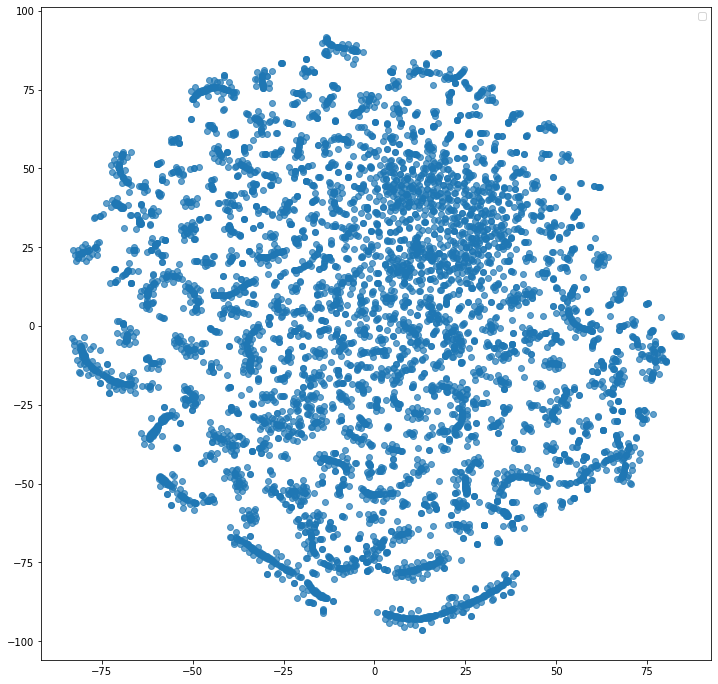

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))
plt.scatter(new_arr[:, 0], new_arr[:, 1], alpha = 0.7) 
plt.legend()
plt.show()